In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
from sklearn.datasets import make_classification
X,y = make_classification(n_classes=2, n_samples=100, n_clusters_per_class=1,n_features=2,n_informative=1,n_redundant=0,random_state=41, class_sep=0.3)

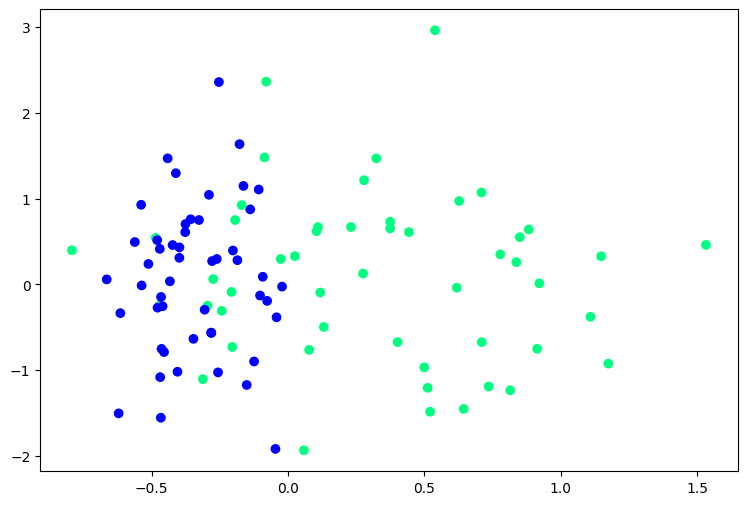

In [50]:
plt.figure(figsize=(9,6))
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.79

In [52]:
clf.fit(X,y)

AdaBoostClassifier(n_estimators=10)

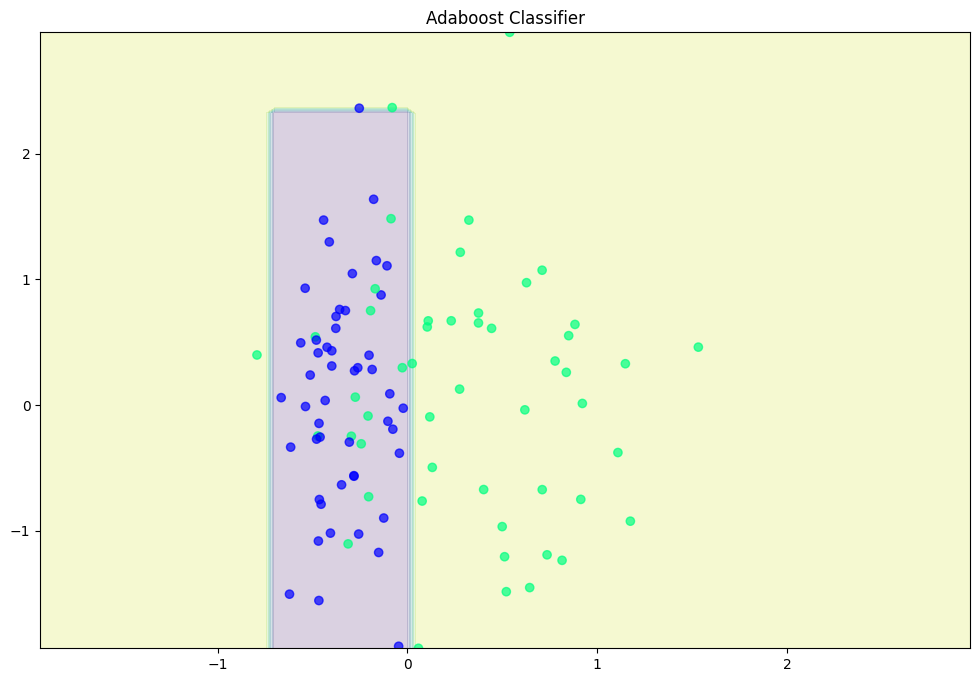

In [53]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(clf)

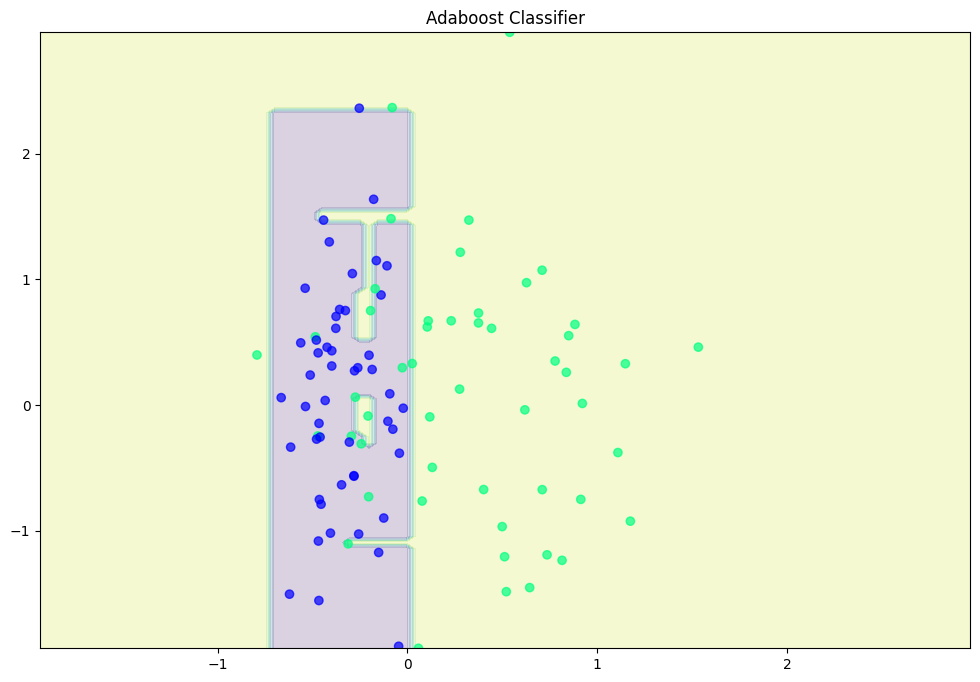

In [54]:
clf2 = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
clf2.fit(X,y)
plot_decision_boundary(clf2)

### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.850000 using {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 500}


In [57]:
from sklearn.model_selection import RandomizedSearchCV
rand = {}
rand['n_estimators'] = [30,80,300,450,700]
rand['learning_rate'] = [0.1, 0.333,0.677,1]

rand_search = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=rand, n_jobs=-1, cv=5, scoring='accuracy')
rand_search = rand_search.fit(X,y)
print(grid_result.best_score_, grid_result.best_params_)

0.85 {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 500}
